# 0. Setup

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('output/processed_data/wrangled_loan_data.csv')

# Section 1: Information for Strategic Stakeholders

## 1.1 Distribution of Loan Amounts
This plot shows the frequency of different loan amounts, helping to understand the typical loan size. As we can se the distribution is right-skewed, with a mean loan amount of approximately $15,000. This means that the majority of the loan amounts are rather small, with a few large loans.

/Users/yanik/Library/Mobile Documents/com~apple~CloudDocs/Documents/Workshops and Courses/CAS_Data_Engineering/Kurs/Leistungsnachweise/Benotet/data_wrangling_testat/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


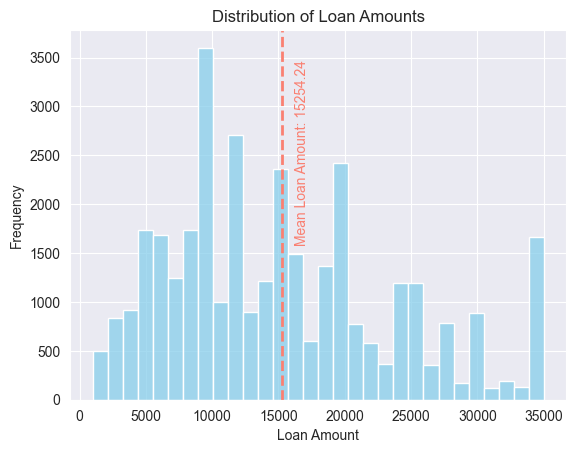

In [49]:
sns.histplot(data=data, x="loan_amnt", bins=30, color='skyblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.axvline(data['loan_amnt'].mean(), color='salmon', linestyle='--', linewidth=2)
plt.text(data['loan_amnt'].mean() + 1000, 1600, f'Mean Loan Amount: {round(data["loan_amnt"].mean(), 2)}', rotation=90, color='salmon')
plt.show()

## 1.2 Loan Status Frequency
Understanding the distribution of loan statuses can inform about the portfolio's health. The majority of loans are current or fully paid, suggesting a generally healthy loan portfolio.

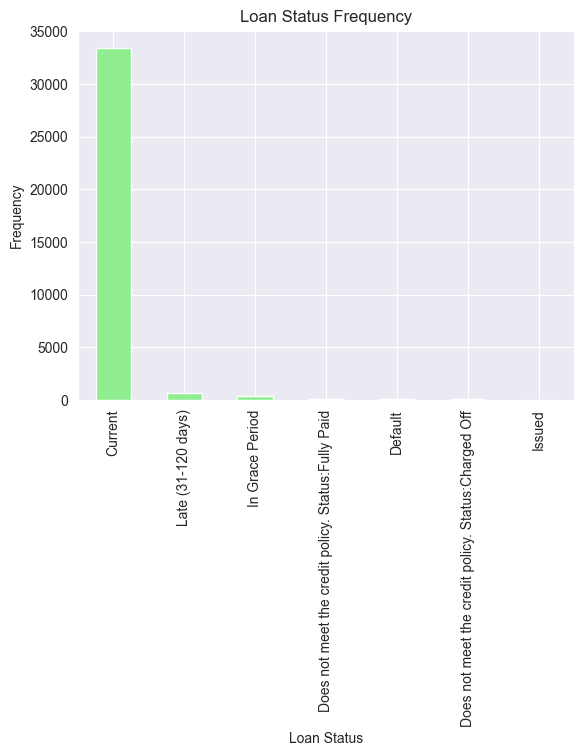

In [50]:
data['loan_status'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Loan Status Frequency')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## 1.3 Interest Rate Distribution
Insight into the distribution of interest rates can highlight the loan products' competitiveness and risk. Interest rates are moderately distributed, pointing towards a balance of risk across the portfolio.

/Users/yanik/Library/Mobile Documents/com~apple~CloudDocs/Documents/Workshops and Courses/CAS_Data_Engineering/Kurs/Leistungsnachweise/Benotet/data_wrangling_testat/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


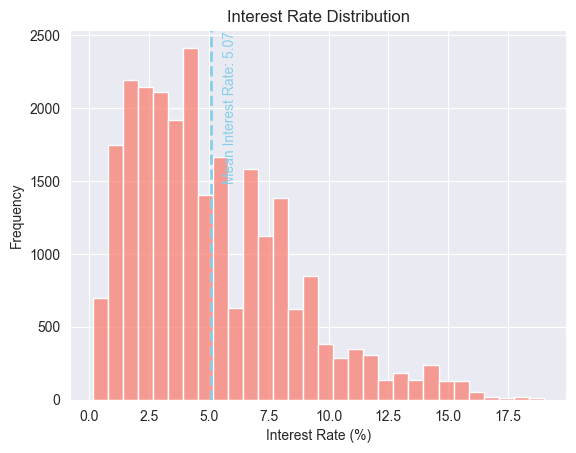

In [51]:
sns.histplot(data=data, x="int_rate", bins=30, color='salmon')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.axvline(data['int_rate'].mean(), color='skyblue', linestyle='--', linewidth=2)
plt.text(data['int_rate'].mean() + 0.5, 1500, f'Mean Interest Rate: {round(data["int_rate"].mean(),2)}', rotation=90, color='skyblue')
plt.show()

# 2. Information for Analyst Stakeholders

# 2.1 Loan Purpose Frequency
Identifies the common reasons borrowers take out loans. Debt consolidation is the most common purpose, indicating a trend towards financial management.

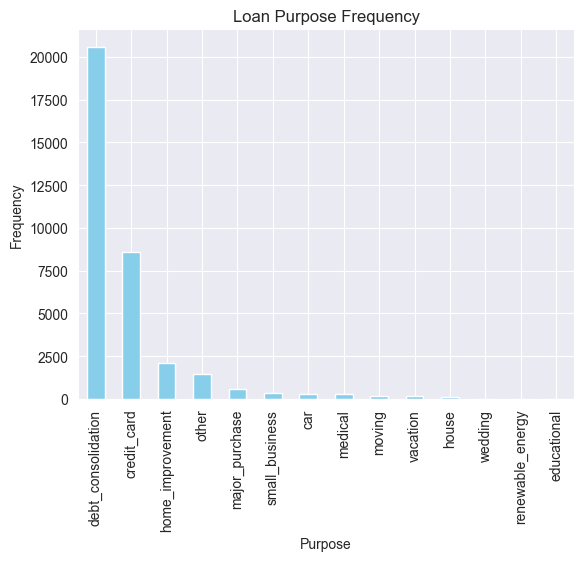

In [52]:
data['purpose'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Loan Purpose Frequency')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# 2.2 Annual Income Distribution
The distribution shows a concentration of middle-income earners, with few high-income borrowersUnderstanding borrowers' income levels can aid in risk assessment.

/Users/yanik/Library/Mobile Documents/com~apple~CloudDocs/Documents/Workshops and Courses/CAS_Data_Engineering/Kurs/Leistungsnachweise/Benotet/data_wrangling_testat/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


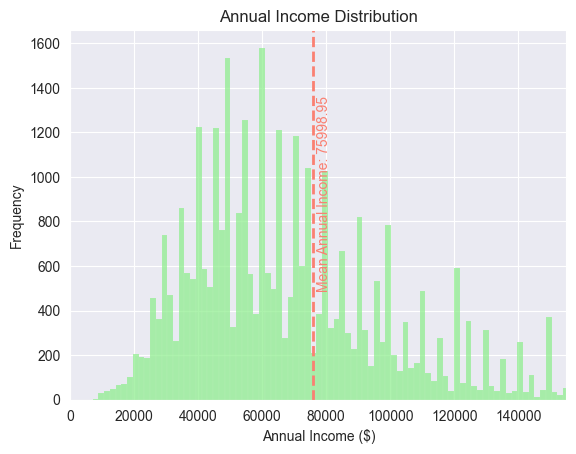

In [53]:
sns.histplot(data=data, x="annual_inc", bins=1000, color='lightgreen')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.xlim(0, data['annual_inc'].quantile(0.95))
plt.axvline(data['annual_inc'].mean(), color='salmon', linestyle='--', linewidth=2)
plt.text(data['annual_inc'].mean() + 1000, 500, f'Mean Annual Income: {round(data["annual_inc"].mean(), 2)}', rotation=90, color='salmon')
plt.show()

# 2.3 Correlation Heatmap
Exploring relationships between numerical features can uncover insights for further analysis. The heatmap aids in identifying potentially interesting correlations for detailed analysis.

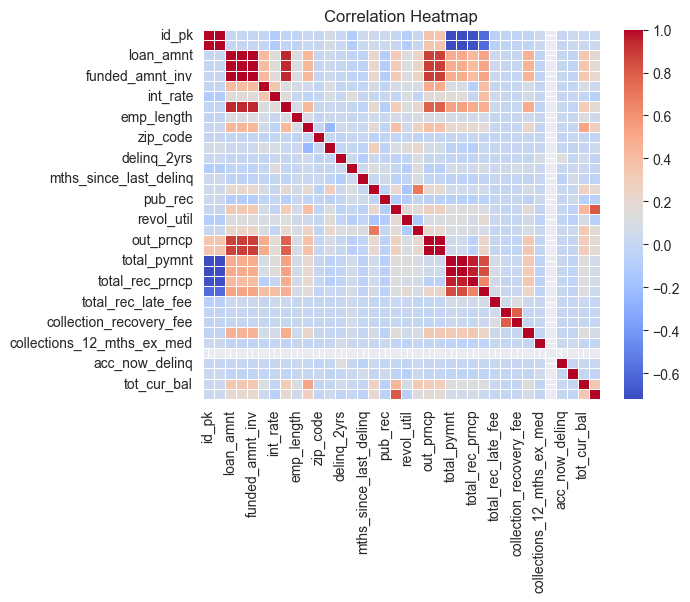

In [54]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. Information for Operational Stakeholders

## 3.1 Missing Values per Column
Highlighting columns with significant missing values to address data quality issues. Identifying missing values is critical for ensuring data integrity and quality.

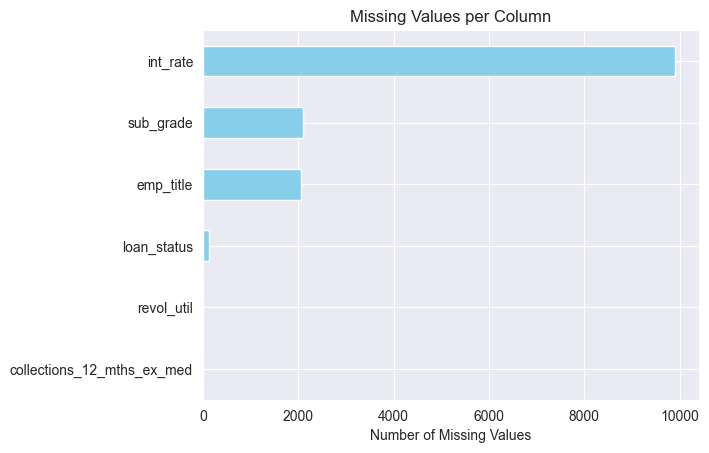

In [55]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values().plot(kind='barh', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.show()

## 3.2 Box Plot of Loan Amount by Loan Status
Examining the distribution of loan amounts across different statuses can reveal outliers or data quality concerns. The plot helps identify variations in loan amount distributions, which could inform risk management strategies.

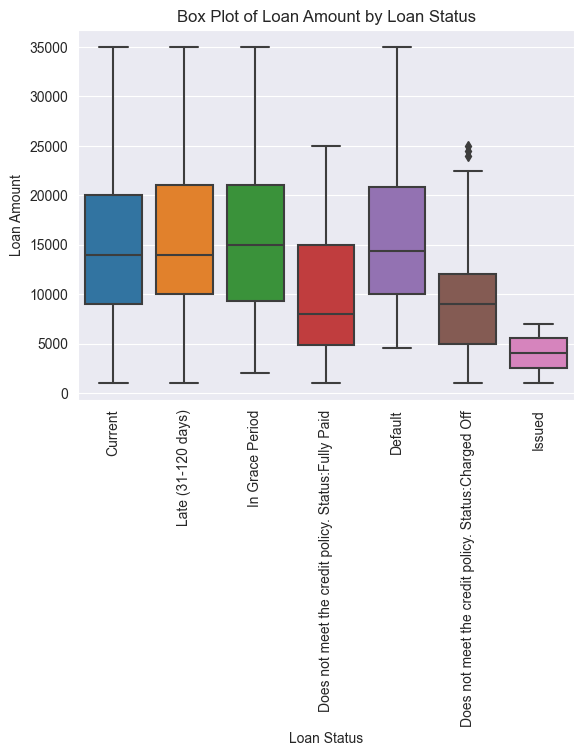

In [56]:
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Box Plot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.show()